In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.decomposition import PCA

In [2]:
M=pd.read_csv('Sample Dataset.csv')
M=M.drop('CUST_ID',axis=1)
M=M.fillna(method='ffill')
print(M.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

C:\Users\Prasanna\AppData\Local\Temp\ipykernel_11480\1931787070.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  M=M.fillna(method='ffill')


In [3]:
s=StandardScaler()
M_scaled=s.fit_transform(M)
M_normalized=normalize(M_scaled)
M_normalized=pd.DataFrame(M_normalized)

In [4]:
p=PCA(n_components=2)
M_p=p.fit_transform(M_normalized)
M_p=pd.DataFrame(M_p,columns=['C1','C2'])
print(M_p.head())

         C1        C2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330633  0.268881
3 -0.481657 -0.097611
4 -0.563512 -0.482506


In [17]:
db=DBSCAN(eps=0.0375,min_samples=3).fit(M_p)
labelling=db.labels_

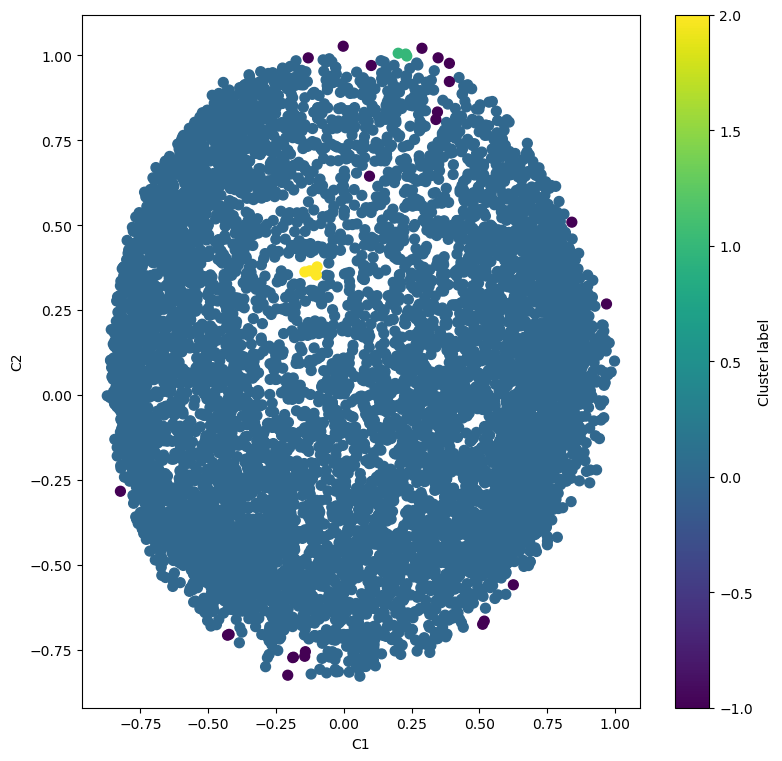

In [19]:
plt.figure(figsize=(9,9))
plt.scatter(M_p['C1'],M_p['C2'],c=labelling,cmap='viridis',s=50)
plt.xlabel('C1')
plt.ylabel('C2')
plt.colorbar(label='Cluster label')
plt.show()

In [20]:
# Tuning the parameters of the model inside the DBSCAN function
dts = DBSCAN(eps = 0.0375, min_samples = 50).fit(M_p)
# Labelling the clusters of data points
labeling = dts.labels_

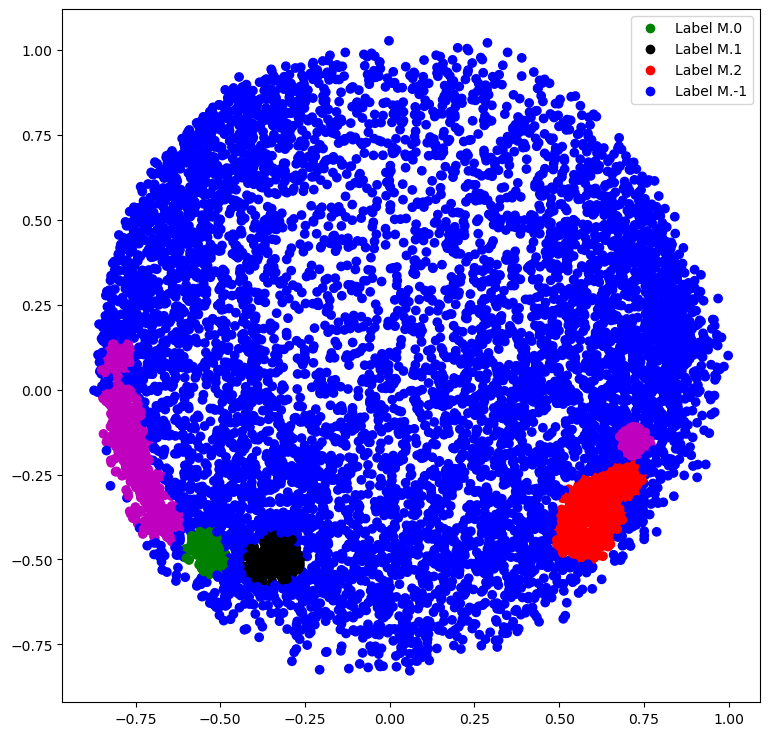

In [21]:
colors = {0: 'g', 1: 'k', 2: 'r', -1: 'b'} # Define colors for each cluster label
cvec = [colors[label] if label in colors else 'm' for label in labeling]  # Default to magenta for other labels
plt.figure(figsize=(9, 9))
plt.scatter(M_p['C1'], M_p['C2'], c=cvec)
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'Label M.{label}', markerfacecolor=color, markersize=8)
                   for label, color in colors.items()]
plt.legend(handles=legend_elements)
plt.show()